<a href="https://colab.research.google.com/github/PrecyMaeMwanyungu/https-Lasso_Ridge_Quantile_and_ElasticNet_Regression/blob/master/Precy_Mae_IP_W7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [48]:
df.shape

(21613, 20)

In [49]:
for i in df.columns:
 print(" {}    unique values are -----> {}".format(i,len(df[i].unique())))

 id    unique values are -----> 21436
 price    unique values are -----> 3625
 bedrooms    unique values are -----> 13
 bathrooms    unique values are -----> 30
 sqft_living    unique values are -----> 1038
 sqft_lot    unique values are -----> 9782
 floors    unique values are -----> 6
 waterfront    unique values are -----> 2
 view    unique values are -----> 5
 condition    unique values are -----> 5
 grade    unique values are -----> 12
 sqft_above    unique values are -----> 946
 sqft_basement    unique values are -----> 306
 yr_built    unique values are -----> 116
 yr_renovated    unique values are -----> 70
 zipcode    unique values are -----> 70
 lat    unique values are -----> 5034
 long    unique values are -----> 752
 sqft_living15    unique values are -----> 777
 sqft_lot15    unique values are -----> 8689


## Feature Engineering

In [50]:
# To get the age column, I will first get current year minus year build
import datetime 
df['hse_age']=datetime.datetime.now().year-df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33


In [51]:
# Creating a column containing yrs since renovation
import datetime 
df['yrs_since_renovation']=datetime.datetime.now().year-df['yr_renovated']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65,2020
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69,29
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87,2020
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55,2020
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33,2020


In [52]:
# Fixing the years since renovation containing 2020 to the actual age
df.loc[df['yrs_since_renovation']== 2020, 'yrs_since_renovation'] =datetime.datetime.now().year -df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,65,65
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,69,29
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,87,87
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,55,55
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,33,33


In [53]:
df.drop(['yr_built','yr_renovated','id','long','lat'], axis = 1, inplace= True) 
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,65,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,69,29
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,87,87


In [54]:
# Creating categorical features
cat_features=["bedrooms","bathrooms","floors","waterfront","view","condition","grade","zipcode"]
# 
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
  lbl_encoders[feature]=LabelEncoder()
  df[feature]= lbl_encoders[feature].fit_transform(df[feature])

In [55]:
df.dtypes

price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
zipcode                   int64
sqft_living15             int64
sqft_lot15                int64
hse_age                   int64
yrs_since_renovation      int64
dtype: object

In [56]:
# Changing the data types to category
#for feature in cat_features:
#  df[feature]= df[feature].astype('category')

In [57]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
0,221900.0,3,3,1180,5650,0,0,0,2,5,1180,0,66,1340,5650,65,65
1,538000.0,3,8,2570,7242,2,0,0,2,5,2170,400,55,1690,7639,69,29
2,180000.0,2,3,770,10000,0,0,0,2,4,770,0,16,2720,8062,87,87
3,604000.0,4,11,1960,5000,0,0,0,4,5,1050,910,58,1360,5000,55,55
4,510000.0,3,7,1680,8080,0,0,0,2,6,1680,0,37,1800,7503,33,33


In [58]:
for i in df.columns:
 print(" {}    unique values are -----> {}".format(i,len(df[i].unique())))

 price    unique values are -----> 3625
 bedrooms    unique values are -----> 13
 bathrooms    unique values are -----> 30
 sqft_living    unique values are -----> 1038
 sqft_lot    unique values are -----> 9782
 floors    unique values are -----> 6
 waterfront    unique values are -----> 2
 view    unique values are -----> 5
 condition    unique values are -----> 5
 grade    unique values are -----> 12
 sqft_above    unique values are -----> 946
 sqft_basement    unique values are -----> 306
 zipcode    unique values are -----> 70
 sqft_living15    unique values are -----> 777
 sqft_lot15    unique values are -----> 8689
 hse_age    unique values are -----> 116
 yrs_since_renovation    unique values are -----> 116


### Standardization

In [59]:
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler= StandardScaler()
columns_to_scale=['sqft_living', 'sqft_lot','sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'hse_age',
       'yrs_since_renovation']
df[columns_to_scale]=StandardScaler.fit_transform(df[columns_to_scale])

### Multicollinearity

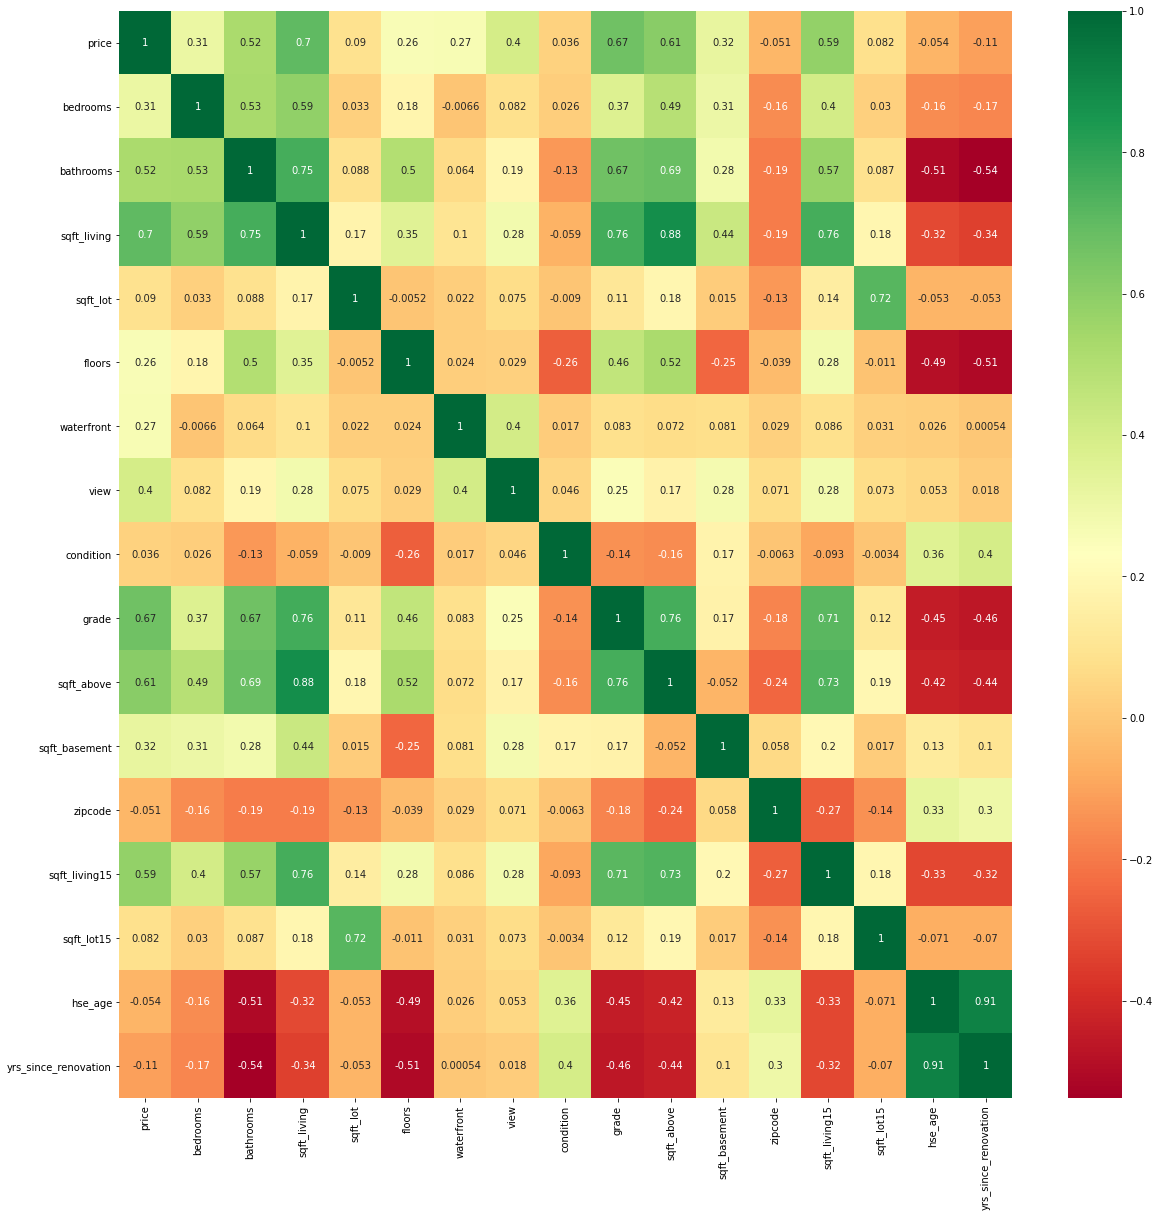

In [60]:
corrmat= df.corr()
top_corr_features= corrmat.index
#
plt.figure(figsize=(20,20))
# Plot heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [61]:
# Check the VIF score of each variable diagonally
pd.DataFrame(np.linalg.inv(corrmat.values), index = corrmat.index, columns=corrmat.columns)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,hse_age,yrs_since_renovation
price,2.891911,0.305762,-0.283033,-1.201650e+00,0.001562,-0.115287,-0.394891,-0.260655,-0.097237,-1.105552,1.836750e-02,-1.064788e-02,0.002535,-0.131698,0.119134,-0.864729,0.029409
bedrooms,0.305762,1.732765,-0.514795,-1.284794e+00,0.051331,0.040037,0.025230,0.087063,-0.060927,0.217734,1.193781e-01,4.920252e-02,0.095660,0.020194,0.103250,-0.122250,-0.101886
bathrooms,-0.283033,-0.514795,3.404234,-1.631415e+00,-0.021234,-0.663596,0.039706,-0.018358,-0.138148,-0.177845,3.271261e-01,-2.308010e-01,0.002727,0.100555,0.064310,0.333170,0.688950
sqft_living,-1.202058,-1.283804,-1.630142,-9.066841e+12,-0.066359,0.668986,0.210676,-0.434633,-0.108824,-0.407635,8.174908e+12,4.369097e+12,-0.153769,-0.621046,-0.174515,-0.268987,0.034114
sqft_lot,0.001562,0.051331,-0.021234,-6.638708e-02,2.090612,0.062059,0.028835,-0.056676,0.027324,-0.012260,-1.736442e-01,2.928257e-03,0.054732,0.140360,-1.472039,-0.007442,-0.042339
floors,-0.115287,0.040037,-0.663596,6.686140e-01,0.062059,2.001245,0.009662,-0.027969,0.090752,-0.248800,-1.021626e+00,2.948072e-01,-0.274254,0.296636,0.084691,0.201770,0.258048
waterfront,-0.394891,0.025230,0.039706,2.106794e-01,0.028835,0.009662,1.254495,-0.459757,0.004310,0.198971,-1.578842e-01,-2.653213e-02,0.009426,0.079291,-0.033440,0.044691,0.074223
view,-0.260655,0.087063,-0.018358,-4.345806e-01,-0.056676,-0.027969,-0.459757,1.438160,-0.013223,-0.070980,5.208836e-01,1.793446e-03,-0.117059,-0.279125,-0.014286,-0.138824,0.054219
condition,-0.097237,-0.060927,-0.138148,-1.088181e-01,0.027324,0.090752,0.004310,-0.013223,1.257368,-0.005255,1.856981e-01,-1.956636e-02,0.176560,0.086338,-0.034111,0.011078,-0.540309
grade,-1.105552,0.217734,-0.177845,-4.075972e-01,-0.012260,-0.248800,0.198971,-0.070980,-0.005255,3.682643,-7.343102e-01,-1.251559e-01,-0.132859,-0.814049,0.070603,0.591197,0.194119


##  Multiple Linear Regression

In [62]:
# Get your dependent and independent variable
X= df.loc[:, df.columns != 'price']

y= df.iloc[:, df.columns == 'price']

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [64]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:

print("linear R score:", linear.score(X_test, y_test)) 
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("linear coef:", linear.coef_)

linear R score: 0.6682270920645789
linear MSE: 47100762179.531784
linear coef: [[-4.06159985e+04  9.97732218e+03  7.64876900e+04  8.15146395e+02
   1.55362695e+04  5.51349351e+05  4.24230342e+04  2.19302446e+04
   1.20496589e+05  6.50403312e+04  3.70335189e+04 -3.39002036e+01
   1.79532394e+04 -1.48843988e+04  1.08668698e+05 -3.43115329e+03]]


In [66]:
linear= linear.predict(X_test)

Text(0.5, 1.0, '           prediction difference between actual vs predicted price')

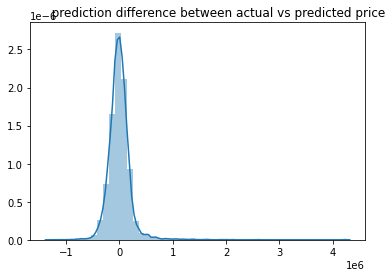

In [67]:
# Plotting  predictions for linear regression
import seaborn as sns
sns.distplot(y_test-linear)
plt.title("           prediction difference between actual vs predicted price")

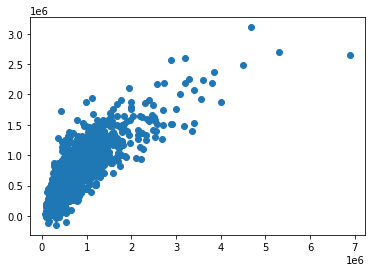

In [68]:
plt.scatter(y_test, linear)

## Quantile Regression

In [69]:
# Get your dependent and independent variable
import numpy as np

noise = np.random.normal(0,1,16)
x= df.loc[:, df.columns != 'price']+ noise
noise1= np.random.normal(0,1,1)
y= df.iloc[:, df.columns == 'price']+noise1

In [70]:
import statsmodels.formula.api as smf

# 
mod=smf.quantreg('y~x',df)
q1=mod.fit(q=0.1)
q5=mod.fit(q=0.5)
q9=mod.fit(q=0.9)

# print summary of the model
print("10th Percentile")
print(q1.summary())
print("")
print("50th Percentile")
print(q5.summary())
print("")
print("90th Percentile")
print(q9.summary())

ValueError: ignored

In [ ]:
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

## Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

## Ridge Regression

## Elastic Net Regression